## Importing necessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [ ]:
url= "https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating&start=1"
headers= "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"

def get_page_contents(url):
    page= requests.get(url, headers)
    return BeautifulSoup(page.text, "html.parser")
soup= get_page_contents(url)
soup

In [ ]:
page= requests.get(url, headers)
page.status_code

### Status Code Meanings
* 200- successful
* 400- webpage doesn't exist
* 500- unauthorized

## Movie information needed:
* Movie Title
* Release Year
* Audience Rating
* Runtime
* Genre
* IMDB Rating
* Number of Votes
* Box Office Earnings

## Find and Extract the Data Elements

In [ ]:
soup.title.text

In [ ]:
movies= soup.find_all("div", class_="lister-item-content")


In [ ]:
titles= [movie.find("a").text for movie in movies]
release= [movie.find("span", class_="lister-item-year text-muted unbold").text[1:-1] for movie in movies]

# I think audience_rating doesn't collect just text because some of the fields are missing from the website(not all websites have uadience rating)
audience_rating= [movie.find("span", class_= "certificate") for movie in movies] 
runtime= [movie.find("span", class_="runtime").text for movie in movies]
genre= [movie.find("span", class_="genre").text.strip() for movie in movies]

# the .text takes the only text part within the div tag which is the imdb rating in brackets
imdb_rating= [movie.find("div", class_="inline-block ratings-imdb-rating").text.strip() for movie in movies]

votes=[movie.find("span", {"name":"nv"}).text for movie in movies]
earnings= [movie.find("span", {"name":"nv"}).text for movie in movies]


## Create and Display the Data Frame

In [ ]:
movies_dict= {"Title": titles, "Release": release, "Audience Rating": audience_rating, "Run-Time": runtime, "Genre": genre, "IMDB Rating": imdb_rating, "Votes": votes}

movies= pd.DataFrame(movies_dict)
movies

## To get Multiple pages

In [ ]:
headers= {"User Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

titles= []
release=[]
audience_rating= []
runtime=[]
genre= []
imdb_ratings= []
votes= []
earnings= []

pages= np.arange(1,1001 ,100)
for page in pages:
    url= "https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)

    results= requests.get(url, headers)
    soup= BeautifulSoup(results.text, "html.parser")

    movies= soup.find_all("div", class_="lister-item mode-advanced")
    sleep(randint(2,10))
    print(page)
    
    for movie in movies:
        name= movie.h3.a.text
        titles.append(name)
        year_release= movie.find("span", class_="lister-item-year text-muted unbold").text[1:-1]
        release.append(year_release)

        # I think audience_rating doesn't collect just text because some of the fields are missing from the website(not all websites have uadience rating)
        rating= movie.find("span", class_= "certificate")
        audience_rating.append(rating)
        time= movie.find("span", class_="runtime").text
        runtime.append(time)
        category= movie.find("span", class_="genre").text.strip()
        genre.append(category)           

        # the .text takes the only text part within the div tag which is the imdb rating in brackets
        imdb_r= movie.find("div", class_="inline-block ratings-imdb-rating").text.strip()
        imdb_rating.append(imdb_r)

        vote= movie.find("span", {"name":"nv"}).text
        votes.append(vote)
        earning= movie.find("span", {"name":"nv"}).text
        earnings.append(earning)
        
movies_info= {"Title": titles, "Release": release, "Audience Rating": audience_rating, "Run-Time": runtime, "Genre": genre, "IMDB Rating": imdb_rating, "Votes": votes,"earnings": earning}
   
df = pd.DataFrame.from_dict(movies_info, orient='index')
df = df.transpose()
df

# We're going to be using the Kaggle IMDB dataset for the Recommendation Engine
* since it has a more elaborate number of columns

In [2]:
pd.options.display.max_rows = None
pd.set_option("max_colwidth", 30)


In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
movies= pd.read_csv("movie_metadata.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_tt_tt_1,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_tt_tt_1,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_tt_tt_1,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_tt_tt_1,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [5]:
movies.shape

(5043, 28)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Missing Values

In [7]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
round(100*(movies.isnull().sum()/len(movies.index)), 2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [9]:
movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]

In [10]:
movies.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [11]:
movies= movies.drop(["aspect_ratio"], axis=1)
movies= movies.drop(["plot_keywords"], axis=1)
movies= movies.drop(["content_rating"], axis=1)

In [12]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,263700000.0,2012.0,632.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,http://www.imdb.com/title/tt0390384/?ref_=fn_tt_tt_1,371.0,English,USA,7000.0,2004.0,45.0,7.0,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,http://www.imdb.com/title/tt0428303/?ref_=fn_tt_tt_1,35.0,English,Philippines,7000.0,2005.0,0.0,6.3,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_tt_tt_1,130.0,Spanish,USA,7000.0,1992.0,20.0,6.9,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,http://www.imdb.com/title/tt1880418/?ref_=fn_tt_tt_1,14.0,English,USA,9000.0,2011.0,205.0,6.4,413


In [13]:
movies.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [14]:
movies = movies[movies.isnull().sum(axis=1) <= 2]
movies.isnull().sum()


color                        2
director_name                0
num_critic_for_reviews       1
duration                     1
director_facebook_likes      0
actor_3_facebook_likes       5
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 5
facenumber_in_poster         6
movie_imdb_link              0
num_user_for_reviews         0
language                     3
country                      0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [15]:
movies['actor_2_name'].fillna('Unknown Actor', inplace = True)
movies['actor_3_name'].fillna('Unknown Actor', inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_9620\2063827556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['actor_2_name'].fillna('Unknown Actor', inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_9620\2063827556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['actor_3_name'].fillna('Unknown Actor', inplace = True)


In [16]:
movies.isnull().sum()

color                        2
director_name                0
num_critic_for_reviews       1
duration                     1
director_facebook_likes      0
actor_3_facebook_likes       5
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         6
movie_imdb_link              0
num_user_for_reviews         0
language                     3
country                      0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [17]:
movies= movies.dropna(subset=["color"])
movies= movies.dropna(subset=["actor_3_facebook_likes"])
movies= movies.dropna(subset=["language"])
movies= movies.dropna(subset=["duration"])
movies= movies.dropna(subset=["num_critic_for_reviews"])

In [18]:
movies= movies.drop(["facenumber_in_poster"], axis=1)

In [19]:
movies.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

Now we finally have zero null values

### Feature Engineering:
Let's convert the gross and budget from `$` to `Million $` to make our analysis easier.

In [20]:
movies['gross'] = movies['gross']/1000000
movies['budget'] = movies['budget']/1000000

In [21]:
# Calculating profit
movies['Profit'] = movies['gross'] - movies['budget']

In [22]:
movies[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)


,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [23]:
# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",movies.shape[0])\

# lets remove all the duplicates from the data
movies.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",movies.shape[0])

No. of Rows Before Removing Duplicates:  3874
No. of Rows After Removing Duplicates:  3840


In [24]:
# lets check the top 10 profitable movies again
movies[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


## Manipulating the Language, Duration and Genre Column:

In [25]:
movies['language'].value_counts()

English       3661
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [26]:
# keep only two languages that are English and Foreign.
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    # lets apply the function on the language column
movies['language'] = movies['language'].apply(language)
    # lets check the values again
movies['language'].value_counts()

English    3661
Foreign     179
Name: language, dtype: int64

In [27]:
# We can categorize the duration of movies in two-part i.e., short and long.
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
# lets apply this function on the duration column
movies['duration'] = movies['duration'].apply(duration)
# lets check the values of Duration column
movies['duration'].value_counts()

Short    2923
Long      917
Name: duration, dtype: int64

In [28]:
# let's also check the values in the Genres Column.

movies['genres'].value_counts()

Drama                                                               153
Comedy|Drama|Romance                                                151
Comedy|Drama                                                        147
Comedy                                                              145
Comedy|Romance                                                      136
Drama|Romance                                                       119
Crime|Drama|Thriller                                                 82
Action|Crime|Thriller                                                55
Action|Crime|Drama|Thriller                                          50
Action|Adventure|Sci-Fi                                              46
Action|Adventure|Thriller                                            45
Comedy|Crime                                                         45
Horror                                                               43
Drama|Thriller                                                  

In [29]:
movies['Moviegenres'] = movies['genres'].str.split('|')
movies['Genre1'] = movies['Moviegenres'].apply(lambda x: x[0])
# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
movies['Genre2'] = movies['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
movies['Genre3'] = movies['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
movies['Genre4'] = movies['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
# lets check the head of the  data
movies[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


# Data Visualiation

## Calculating Social Media Popularity:
(No. of People Reviewed for Movie/No. Of People Voted for Movie)*No. Of Facebook Likes.

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


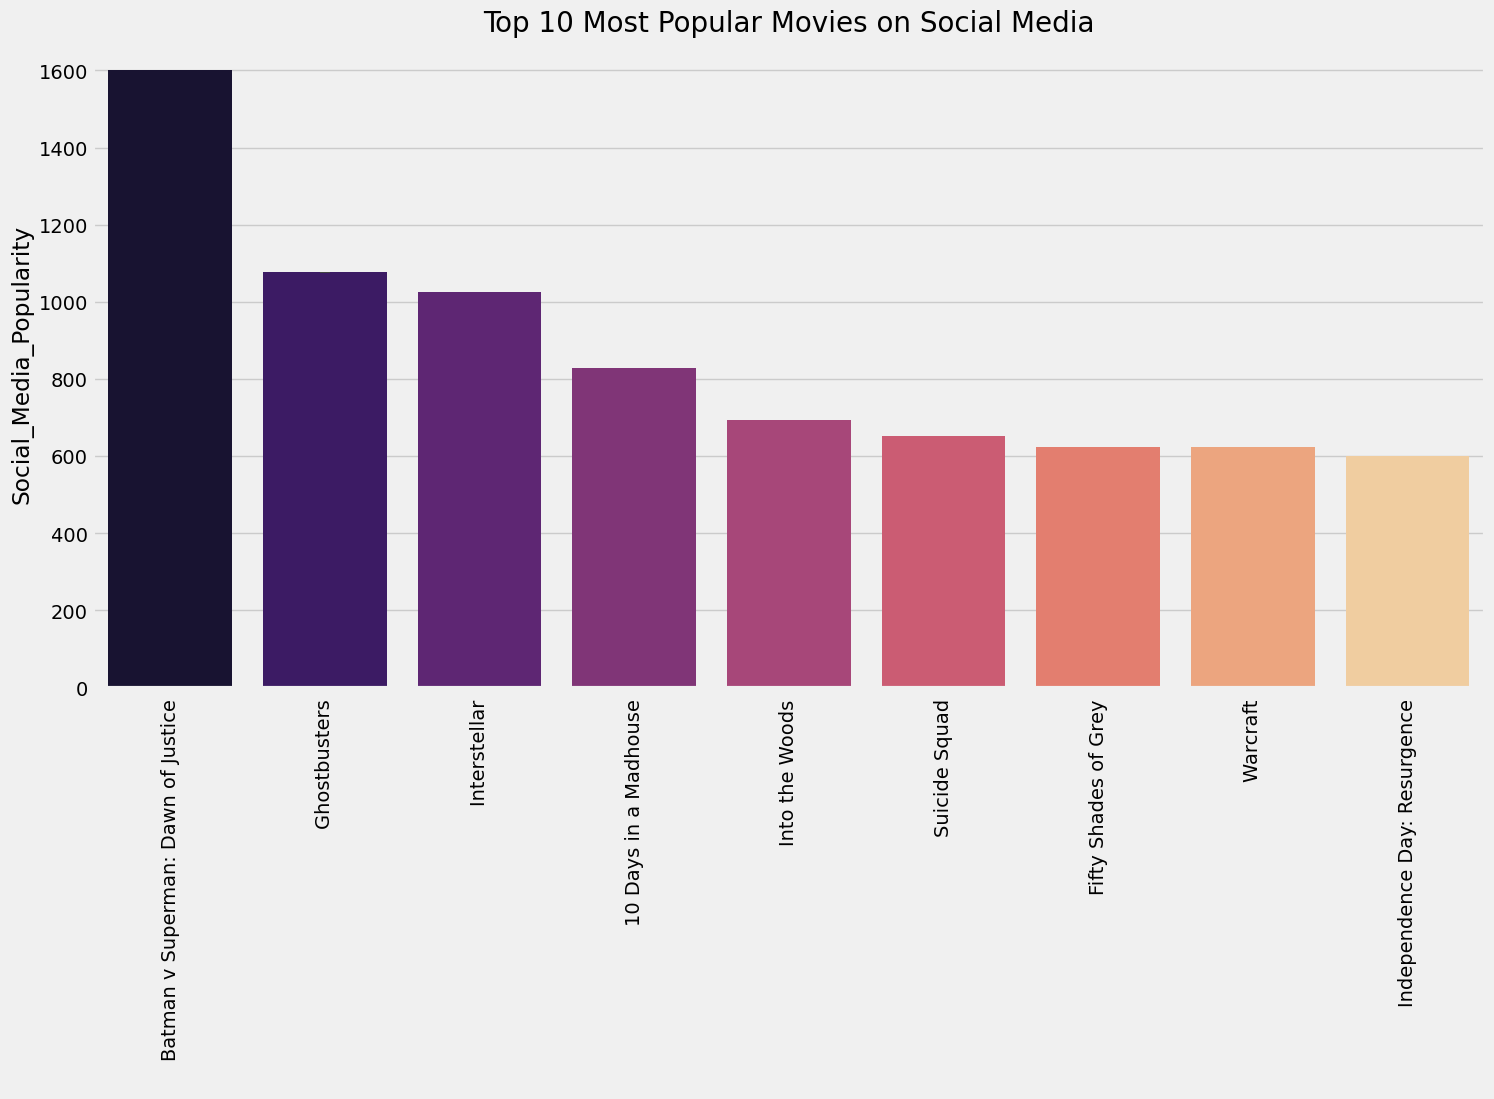

In [30]:
movies['Social_Media_Popularity'] = (movies['num_user_for_reviews'] / movies['num_voted_users']) * movies['movie_facebook_likes']
# lets also check the Top 10 Most Popular Movies on Social Media

x = movies[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity', ascending = False).head(10).reset_index()
print(x)
sns.barplot(x= x['movie_title'], y= x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

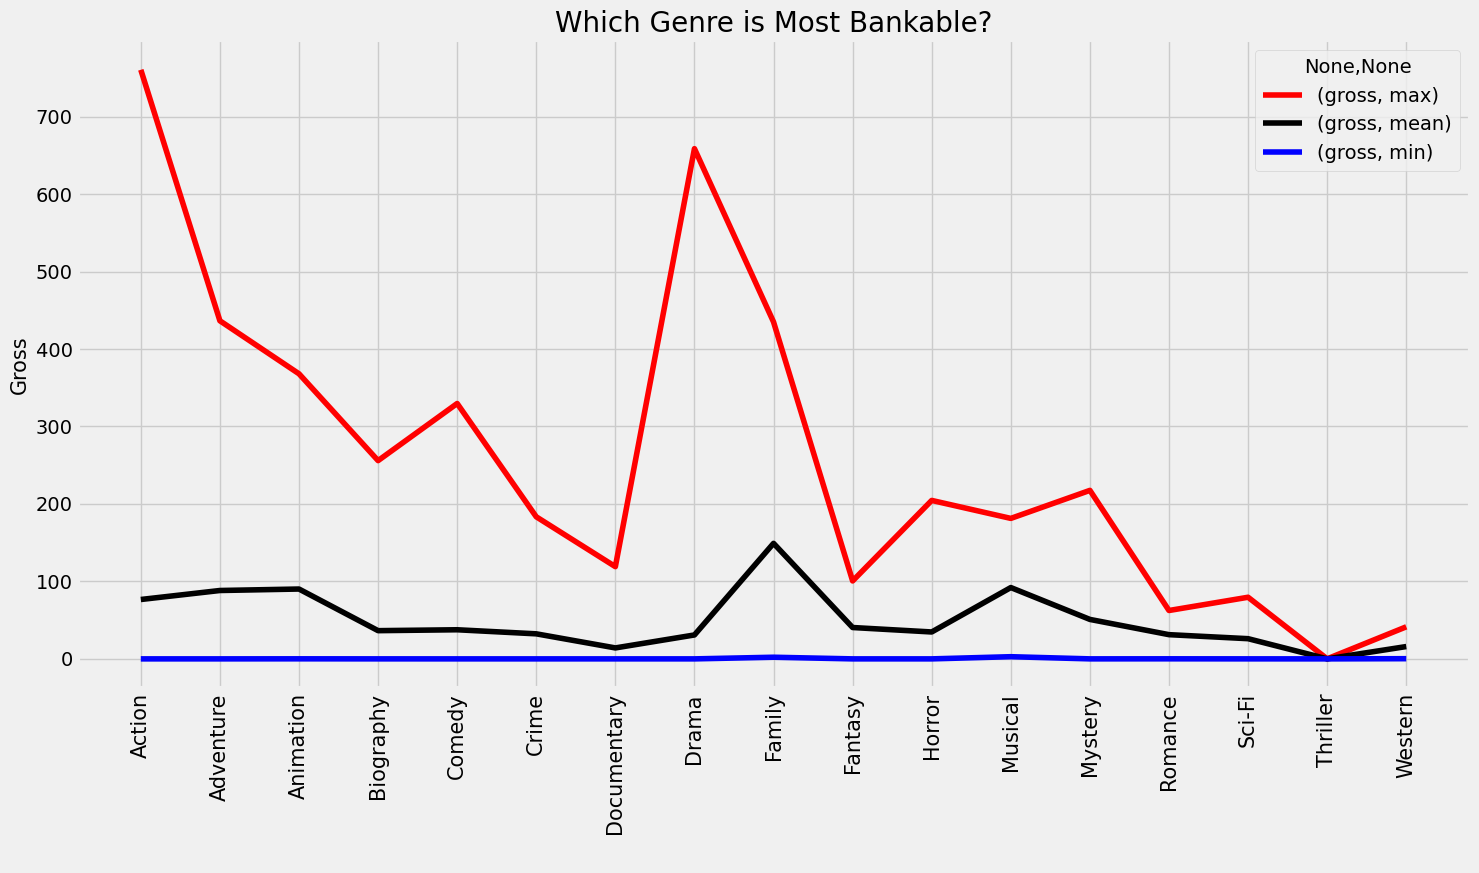

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [31]:
## Let'scompare the Gross with Genres
movies[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()
print('The Most Profitable Movie from each Genre')
display(movies.loc[movies.groupby(movies['Genre1'])['Profit'].idxmax()][['Genre1','movie_title','gross']].style.background_gradient(cmap = 'copper'))

## More profitable years in box office

Most Profitable Years in Box Office


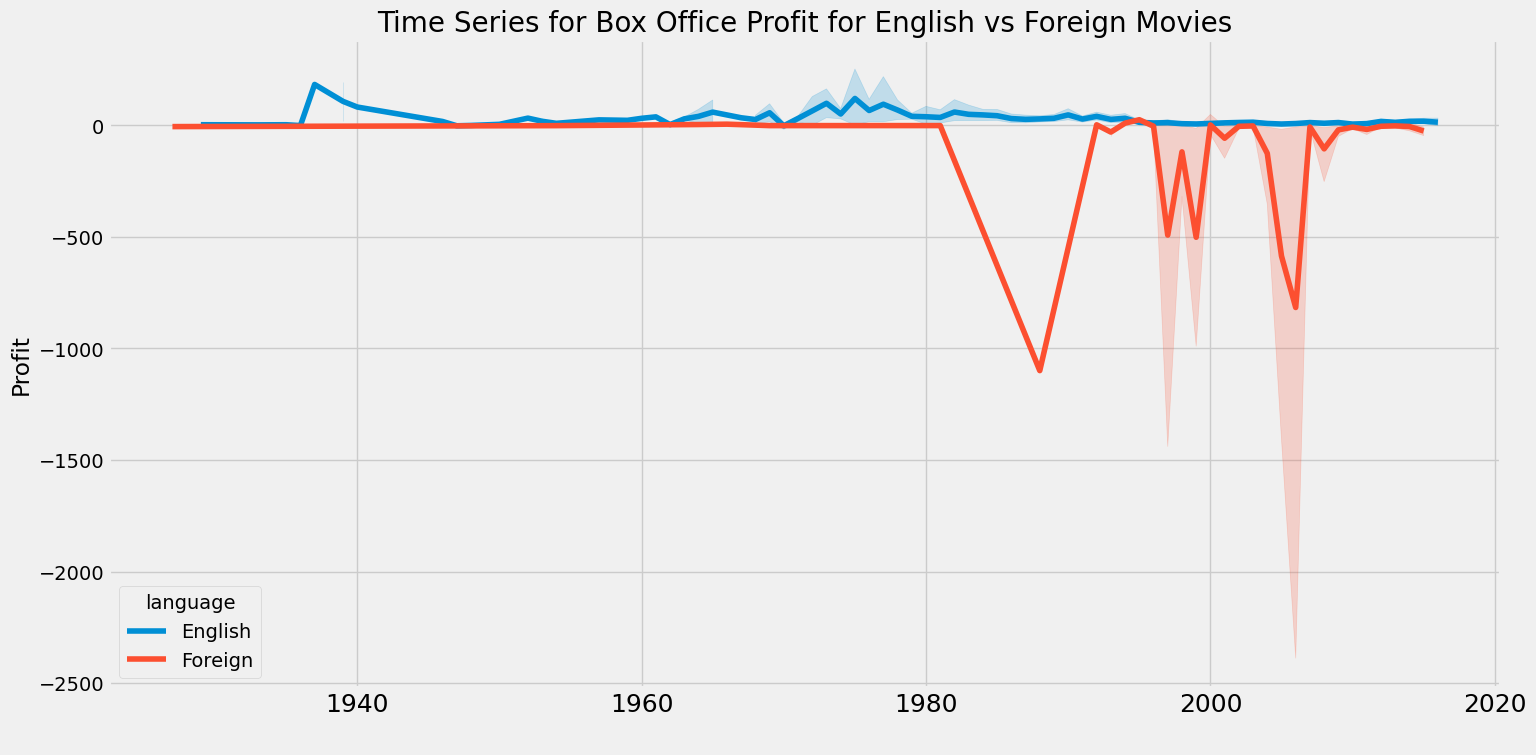

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [32]:
movies['title_year'] = movies['title_year'].astype('int')
print('Most Profitable Years in Box Office')
display(movies[['title_year','language','Profit']].groupby(['language',
'title_year']).agg('sum').sort_values(by = 'Profit',
ascending = False).head(10).style.background_gradient(cmap = 'Greens'))
# lets plot them
sns.lineplot(x=movies['title_year'], y=movies['Profit'], hue = movies['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()
print("Movies that Made Huge Losses")
display(movies[movies['Profit'] < -2000][['movie_title',
'language','Profit']].style.background_gradient(cmap = 'Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

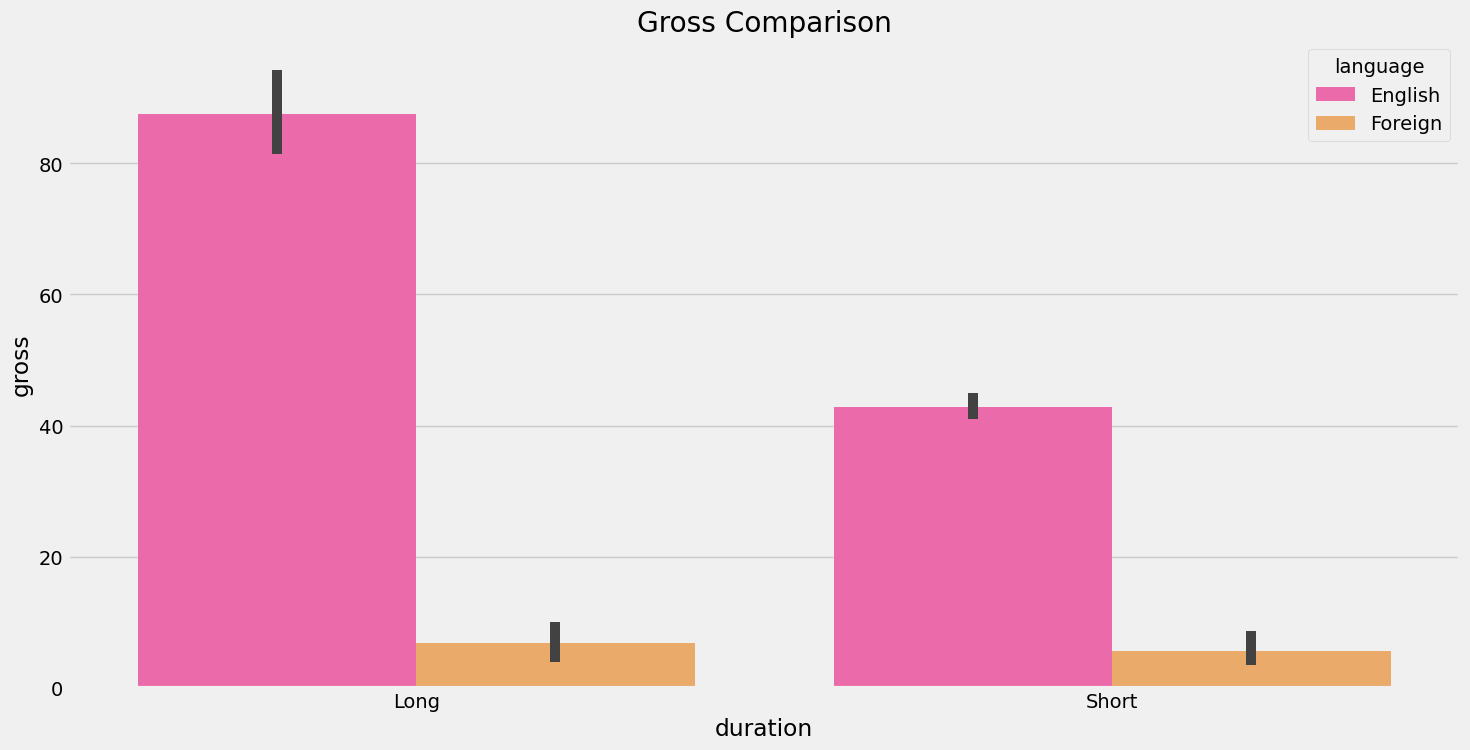

In [33]:
display(movies[movies['duration'] == 'Long'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
display(movies[movies['duration'] == 'Short'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
sns.barplot(x= movies['duration'], y=movies['gross'], hue = movies['language'], palette = 'spring')
plt.title('Gross Comparison')

In [34]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(movies[movies['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(movies[movies['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28


In [35]:
print("\nHighest Rated Long Duration Movie\n",
movies[movies['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n",
movies[movies['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))


Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3175  American History X          8.6


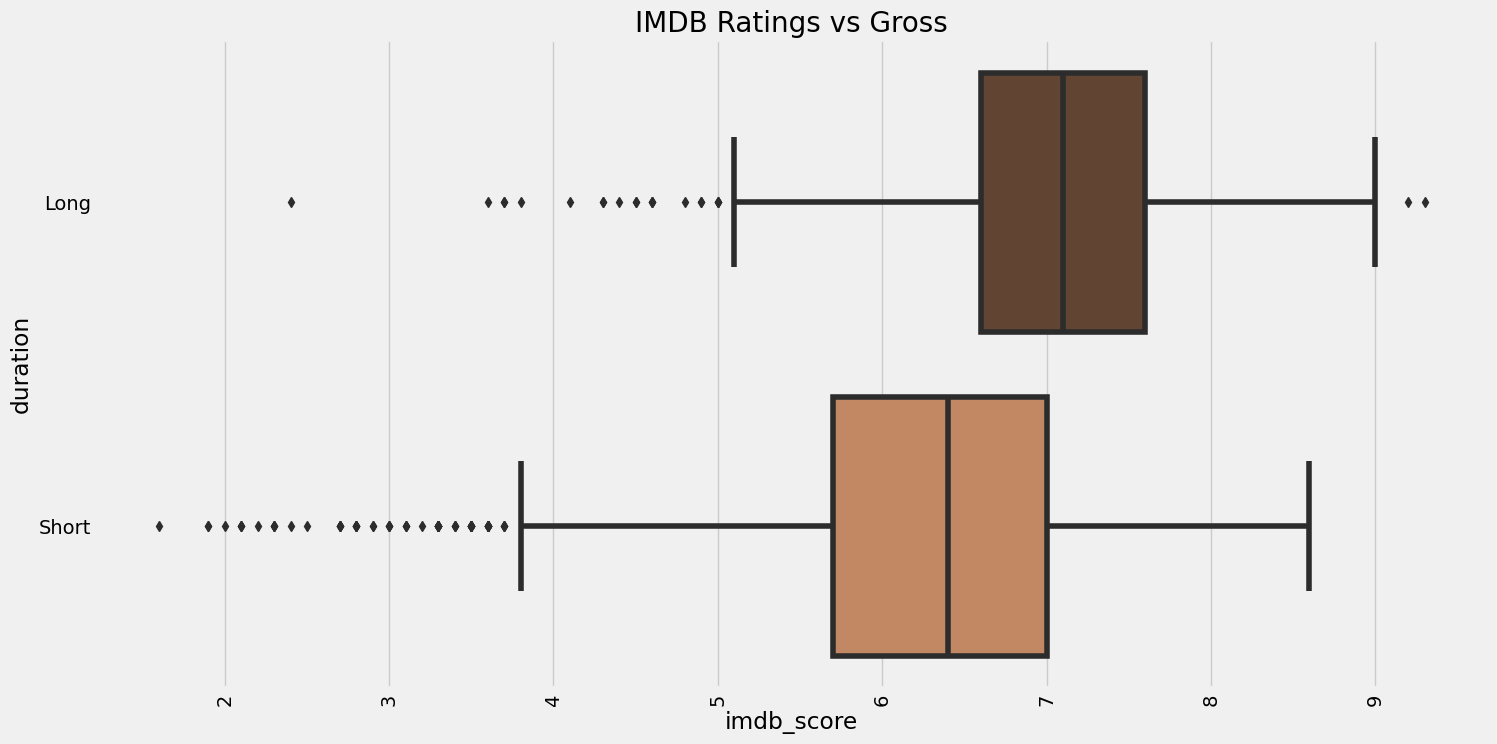

In [36]:
sns.boxplot(x=movies['imdb_score'], y=movies['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [37]:

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = movies.loc[movies[column] > score][[ 'title_year','movie_title',
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'Profit',
    'imdb_score',
    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x


interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [38]:

@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return movies.loc[movies[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

## Recommending Movies based on Languages:

In [39]:
def recommend_lang(x):
    y = movies[['language','movie_title','imdb_score']][movies['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)
recommend_lang('Foreign')


,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4747,Foreign,Seven Samurai,8.7
4029,Foreign,City of God,8.7
2373,Foreign,Spirited Away,8.6
4259,Foreign,The Lives of Others,8.5
4921,Foreign,Children of Heaven,8.5
3931,Foreign,Samsara,8.5
1298,Foreign,Amélie,8.4
2323,Foreign,Princess Mononoke,8.4
1329,Foreign,Baahubali: The Beginning,8.4


In [40]:
recommend_lang("English")

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
339,English,The Lord of the Rings: The Return of the King,8.9
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
683,English,Fight Club,8.8
97,English,Inception,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


## Recommending Movies Based on Actors:

In [41]:
def recommend_movies_on_actors(x):
    a = movies[['movie_title','imdb_score']][movies['actor_1_name'] == x]
    b = movies[['movie_title','imdb_score']][movies['actor_2_name'] == x]
    c = movies[['movie_title','imdb_score']][movies['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)
recommend_movies_on_actors('Anne Hathaway')

C:\Users\user\AppData\Local\Temp\ipykernel_9620\1283271535.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(b)
C:\Users\user\AppData\Local\Temp\ipykernel_9620\1283271535.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(c)


,movie_title,imdb_score
96,Interstellar,8.6
2819,Brokeback Mountain,7.7
658,Les Misérables,7.6
1209,The Intern,7.2
3205,Nicholas Nickleby,7.2
2536,Becoming Jane,7.1
2689,One Day,7.0
384,Rio,7.0
1408,The Devil Wears Prada,6.8
1688,Love & Other Drugs,6.7


## Recommending similar Genres

In [42]:
from mlxtend.preprocessing import TransactionEncoder

x = movies['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)
# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [43]:
# let us convert this data into boolean so that we can perform calculations.

genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [53]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', movies['movie_title'])

genres.head()
     

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [54]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')
genres.head()
     

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Making a recommendation engine for getting similar genres:

In [55]:
def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(5)
recommendation_genres('Documentary')

Music        0.078541
History      0.049308
Biography    0.043970
Sport        0.038592
War          0.025866
dtype: float64

## Recommending similar Movies:

In [56]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()
     

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,The Avengers,Pirates of the Caribbean: On Stranger Tides,Men in Black 3,The Hobbit: The Battle of the Five Armies,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,King Kong,Titanic,Captain America: Civil War,Battleship,Jurassic World,Skyfall,Spider-Man 2,Iron Man 3,Alice in Wonderland,X-Men: The Last Stand,Monsters University,Transformers: Revenge of the Fallen,Transformers: Age of Extinction,Oz the Great and Powerful,The Amazing Spider-Man 2,TRON: Legacy,Cars 2,Green Lantern,Toy Story 3,Terminator Salvation,Furious 7,World War Z,X-Men: Days of Future Past,Star Trek Into Darkness,Jack the Giant Slayer,The Great Gatsby,Prince of Persia: The Sands of Time,Pacific Rim,Transformers: Dark of the Moon,Indiana Jones and the Kingdom of the Crystal Skull,NaN,Brave,Star Trek Beyond,WALL·E,Rush Hour 3,2012,A Christmas Carol,Jupiter Ascending,The Legend of Tarzan,"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe",X-Men: Apocalypse,The Dark Knight,Up,Monsters vs. Aliens,Iron Man,Hugo,Wild Wild West,The Mummy: Tomb of the Dragon Emperor,Suicide Squad,Evan Almighty,Edge of Tomorrow,Waterworld,G.I. Joe: The Rise of Cobra,Inside Out,The Jungle Book,Iron Man 2,Snow White and the Huntsman,Maleficent,Dawn of the Planet of the Apes,NaN,47 Ronin,Captain America: The Winter Soldier,Shrek Forever After,Tomorrowland,Big Hero 6,Wreck-It Ralph,The Polar Express,Independence Day: Resurgence,How to Train Your Dragon,Terminator 3: Rise of the Machines,Guardians of the Galaxy,Interstellar,Inception,NaN,The Hobbit: An Unexpected Journey,The Fast and the Furious,The Curious Case of Benjamin Button,X-Men: First Class,The Hunger Games: Mockingjay - Part 2,The Sorcerer's Apprentice,Poseidon,Alice Through the Looking Glass,Shrek the Third,Warcraft,Terminator Genisys,The Chronicles of Narnia: The Voyage of the Dawn Treader,Pearl Harbor,Transformers,Alexander,Harry Potter and the Order of the Phoenix,Harry Potter and the Goblet of Fire,Hancock,I Am Legend,Charlie and the Chocolate Factory,Ratatouille,Batman Begins,Madagascar: Escape 2 Africa,Night at the Museum: Battle of the Smithsonian,X-Men Origins: Wolverine,The Matrix Revolutions,Frozen,The Matrix Reloaded,Thor: The Dark World,Mad Max: Fury Road,Angels & Demons,Thor,Bolt,G-Force,Wrath of the Titans,Dark Shadows,Mission: Impossible - Rogue Nation,The Wolfman,NaN,Bee Movie,Kung Fu Panda 2,The Last Airbender,Mission: Impossible III,White House Down,Mars Needs Moms,Flushed Away,Pan,Mr. Peabody & Sherman,Troy,Madagascar 3: Europe's Most Wanted,Die Another Day,Ghostbusters,Armageddon,Men in Black II,Beowulf,Kung Fu Panda 3,Mission: Impossible - Ghost Protocol,Rise of the Guardians,Fun with Dick and Jane,The Last Samurai,Exodus: Gods and Kings,Star Trek,Spider-Man,How to Train Your Dragon 2,Gods of Egypt,Stealth,Watchmen,Lethal Weapon 4,Hulk,G.I. Joe: Retaliation,Sahara,Final Fantasy: The Spirits Within,Captain America: The First Avenger,The World Is Not Enough,Master and Commander: The Far Side of the World,The Twilight Saga: Breaking Dawn - Part 2,Happy Feet 2,The Incredible Hulk,NaN,The BFG,The Revenant,Turbo,Rango,Penguins of Madagascar,The Bourne Ultimatum,Kung Fu Panda,Ant-Man,The Hunger Games: Catching Fire,NaN,Home,War of the Worlds,Bad Boys II,Puss in Boots,Salt,Noah,The Adventures of Tintin,Harry Potter and the Prisoner of Azkaban,Australia,After Earth,Dinosaur,NaN,Night at the Museum: Secret of the Tomb,Megamind,Harry Potter and the Sorcerer's Stone,R.I.P.D.,NaN,Pirates of the Caribbean: The Curse of the Black Pearl,NaN,The Hunger Games: Mockingjay - Part 1,The Da Vinci Code,Rio 2,X-Men 

In [57]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [64]:
# lets test on some results
recommendation_movie('Avatar')

movie_title
The Lone Ranger                     1.000000
Charlie's Angels: Full Throttle     1.000000
Prometheus                          1.000000
The Chronicles of Riddick           1.000000
Daylight                            1.000000
No Strings Attached                 1.000000
Skyline                             1.000000
Oz the Great and Powerful           1.000000
Small Time Crooks                   1.000000
Must Love Dogs                      1.000000
NaN                                 1.000000
NaN                                 0.870572
Free State of Jones                 0.870572
Alice in Wonderland                 0.870572
Cheaper by the Dozen 2              0.870572
NaN                                 0.870572
World War Z                         0.870572
Divergent                           0.870572
Ratatouille                         0.870572
Blindness                           0.870572
dtype: float64